![HenryLogo](https://d31uz8lwfmyn8g.cloudfront.net/Assets/logo-henry-white-lg.png)

# **Proyecto integrador**

### 2. Preparación de datos

Una vez entendido el contexto de la problemática y realizado el análisis exploratorio de datos de acuerdo con la descripción del dataset y la información entregada al equipo en la fase anterior, se comparte un paso a paso que deberá ser diligenciado por el equipo de ciencia de datos asignado para esta tarea con el fin de guiar el proceso de EDA y preparación de datos, lo cual es crucial antes de desarollar el modelamiento. 

El estudio tiene como objetivo la clasificación de un paciente como hospitalizado o no hospitalizado.




Carguen la base de datos y revisen el tipo de cada columna del dataset. Si es necesario realicen conversiones de tipos de datos. 

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

In [2]:
df_main = pd.read_excel('datasets/BBDD_Hospitalización.xlsx')
df_main

,EDAD,DIABETES,HOSPITALIZACIÓN ULTIMO MES,PSA,BIOPSIAS PREVIAS,VOLUMEN PROSTATICO,ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS,NUMERO DE MUESTRAS TOMADAS,CUP,ENF. CRONICA PULMONAR OBSTRUCTIVA,BIOPSIA,NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA,FIEBRE,ITU,TIPO DE CULTIVO,AGENTE AISLADO,PATRON DE RESISTENCIA,HOSPITALIZACION,DIAS HOSPITALIZACION MQ,DIAS HOSPITALIZACIÓN UPC
0,53.0,NO,NO,4.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,2.0,0.0
1,56.0,NO,NO,7.70,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
2,57.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",SI,4.0,3.0
3,56.0,NO,NO,7.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,1,SI,NO,NO,NO,NO,SI,5.0,0.0
4,55.0,NO,NO,29.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,24.0,NO,NO,NEG,1,SI,NO,HEMOCULTIVO,E.COLI,NO,SI,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,69.0,NO,NO,4.43,NaN,NaN,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NaN,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
566,67.0,NO,NO,8.00,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
567,59.0,NO,NO,9.00,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NaN,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Filtramos, eliminamos filas duplicadas
df_main[df_main.duplicated(keep=False)]
df_main = df_main.drop_duplicates(subset=df_main.columns, keep='first')
df_main = df_main.reset_index(drop=True)

In [4]:
df_main.dtypes

EDAD                                                                         float64
DIABETES                                                                      object
HOSPITALIZACIÓN ULTIMO MES                                                    object
PSA                                                                          float64
BIOPSIAS PREVIAS                                                              object
VOLUMEN PROSTATICO                                                            object
ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                                       object
NUMERO DE MUESTRAS TOMADAS                                                   float64
CUP                                                                           object
ENF. CRONICA PULMONAR OBSTRUCTIVA                                             object
BIOPSIA                                                                       object
NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN IN

In [5]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 461 entries, 0 to 460
Data columns (total 20 columns):
 #   Column                                                                     Non-Null Count  Dtype  
---  ------                                                                     --------------  -----  
 0   EDAD                                                                       460 non-null    float64
 1   DIABETES                                                                   460 non-null    object 
 2   HOSPITALIZACIÓN ULTIMO MES                                                 460 non-null    object 
 3   PSA                                                                        456 non-null    float64
 4   BIOPSIAS PREVIAS                                                           458 non-null    object 
 5   VOLUMEN PROSTATICO                                                         459 non-null    object 
 6   ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS                   

In [6]:
# Renombrando los encabezados
df_main.rename(columns={
    'EDAD': 'edad',
    'DIABETES': 'diabetes',
    'HOSPITALIZACIÓN ULTIMO MES': 'hosp_ult_mes',
    'PSA': 'psa',
    'BIOPSIAS PREVIAS': 'biop_prev',
    'VOLUMEN PROSTATICO': 'vol_prostatico',
    'ANTIBIOTICO UTILIAZADO EN LA PROFILAXIS': 'antib_en_profilaxis',
    'NUMERO DE MUESTRAS TOMADAS': 'n_muestras',
    'CUP': 'cup',
    'ENF. CRONICA PULMONAR OBSTRUCTIVA': 'e_cpo',
    'BIOPSIA': 'biopsia',
    'NUMERO DE DIAS POST BIOPSIA EN QUE SE PRESENTA LA COMPLICACIÓN INFECCIOSA': 'n_dias_con_infecc',
    'FIEBRE': 'fiebre',
    'ITU': 'itu',
    'TIPO DE CULTIVO': 'tipo_cultivo',
    'AGENTE AISLADO': 'agente_aislado',
    'PATRON DE RESISTENCIA': 'patron_resistencia',
    'HOSPITALIZACION': 'hospitalizacion',
    'DIAS HOSPITALIZACION MQ': 'dias_hosp_mq',
    'DIAS HOSPITALIZACIÓN UPC': 'dias_hosp_upc'
}, inplace=True)


In [7]:
# Verificación tipo de dato en cada columna del DF
def verificar_datos(df):
    verif = {"nombre_campo": [], "tipo_dato": [], "%_No_Nulos": [], "%_Nulos": [], "Nulos": []}

    for columna in df.columns:
        porcentaje_no_nulos = (df[columna].count() / len(df)) * 100
        verif["nombre_campo"].append(columna)
        verif["tipo_dato"].append(df[columna].apply(type).unique())
        verif["%_No_Nulos"].append(round(porcentaje_no_nulos, 2))
        verif["%_Nulos"].append(round(100-porcentaje_no_nulos, 2))
        verif["Nulos"].append(df[columna].isnull().sum())

    df_info = pd.DataFrame(verif)
        
    return df_info

verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,[<class 'float'>],99.78,0.22,1
1,diabetes,"[<class 'str'>, <class 'float'>]",99.78,0.22,1
2,hosp_ult_mes,"[<class 'str'>, <class 'float'>]",99.78,0.22,1
3,psa,[<class 'float'>],98.92,1.08,5
4,biop_prev,"[<class 'str'>, <class 'float'>]",99.35,0.65,3
5,vol_prostatico,"[<class 'str'>, <class 'float'>]",99.57,0.43,2
6,antib_en_profilaxis,"[<class 'str'>, <class 'float'>]",99.78,0.22,1
7,n_muestras,[<class 'float'>],99.78,0.22,1
8,cup,"[<class 'str'>, <class 'float'>]",99.57,0.43,2
9,e_cpo,"[<class 'str'>, <class 'float'>]",99.35,0.65,3


In [8]:
# Filtramos filas con valores nulos
df_main[df_main.isna().any(axis=1)]

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
9,44.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,2,SI,NO,NO,NO,NO,SI,3.0,0.0
26,75.0,NO,NO,25.00,NO,SI,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, EPOC",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
31,63.0,NO,NO,10.80,NO,NO,FLUOROQUINOLONA_AMINOGLICÓSIDO,12.0,NO,"SI, ASMA",ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
70,57.0,NO,NO,NaN,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,18.0,NO,NO,HIPERPLASIA PROSTATICA,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
86,58.0,NO,NO,7.80,NaN,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
93,70.0,NO,NO,7.20,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
94,74.0,NO,NO,5.80,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0
97,60.0,NO,NO,NaN,SI,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,16.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NO,0.0,0.0
100,65.0,NO,NO,5.97,NO,SI,FLUOROQUINOLONA_AMINOGLICOSIDO,20.0,NO,NO,ADENOCARCINOMA GLEASON 7,NO,NO,NO,NO,NaN,NO,NO,0.0,0.0
103,61.0,NO,NO,7.00,NO,NO,FLUOROQUINOLONA_AMINOGLICOSIDO,12.0,NO,NO,NEG,NO,NO,NO,NO,NO,NO,NaN,0.0,0.0


In [9]:
# Borramos los registros nulos
df_main = df_main.dropna()

In [10]:
# Verificación tipo de dato en cada columna del DF
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,[<class 'float'>],100.0,0.0,0
1,diabetes,[<class 'str'>],100.0,0.0,0
2,hosp_ult_mes,[<class 'str'>],100.0,0.0,0
3,psa,[<class 'float'>],100.0,0.0,0
4,biop_prev,[<class 'str'>],100.0,0.0,0
5,vol_prostatico,[<class 'str'>],100.0,0.0,0
6,antib_en_profilaxis,[<class 'str'>],100.0,0.0,0
7,n_muestras,[<class 'float'>],100.0,0.0,0
8,cup,[<class 'str'>],100.0,0.0,0
9,e_cpo,[<class 'str'>],100.0,0.0,0


## CONVERSIÓN DE DATOS

In [11]:
# Convertimos la columna 'edad' de float a dato integer
df_main['edad'] = df_main['edad'].replace('<NA>', pd.NA)
df_main['edad'] = df_main['edad'].astype('Int64')

In [12]:
# Convertimos la columna 'n_muestras' de float a dato integer
df_main['n_muestras'] = df_main['n_muestras'].astype('Int64')

In [13]:
#Convertimos las columnas 'dias_hosp_mq' y 'dias_hosp_upc' de dato float a dato integer
df_main['dias_hosp_mq'] = df_main['dias_hosp_mq'].astype('Int64')
df_main['dias_hosp_upc'] = df_main['dias_hosp_upc'].astype('Int64')

### Cambiamos el dato 'NO' por un dato numérico '0', para facilitar el análisis posterior

In [14]:
# Reemplazar 'NO' con '0' en la columna 'n_dias_con_infecc'
df_main['n_dias_con_infecc'] = df_main['n_dias_con_infecc'].replace('NO', 0)

# Cambiar el tipo de dato a entero
df_main['n_dias_con_infecc'] = df_main['n_dias_con_infecc'].astype('Int64')


In [15]:
# Verificamos que los cambios hallan sido ejecutados correctamente
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,[<class 'int'>],100.0,0.0,0
1,diabetes,[<class 'str'>],100.0,0.0,0
2,hosp_ult_mes,[<class 'str'>],100.0,0.0,0
3,psa,[<class 'float'>],100.0,0.0,0
4,biop_prev,[<class 'str'>],100.0,0.0,0
5,vol_prostatico,[<class 'str'>],100.0,0.0,0
6,antib_en_profilaxis,[<class 'str'>],100.0,0.0,0
7,n_muestras,[<class 'int'>],100.0,0.0,0
8,cup,[<class 'str'>],100.0,0.0,0
9,e_cpo,[<class 'str'>],100.0,0.0,0


In [16]:
# Cambiamos los datos de las columnas que contienen 'NO/SI' por '0/1' para facilitar el análisis demás procedimientos
df_main = df_main.applymap(lambda x: 0 if x == 'NO' else (1 if x == 'SI' else x))

In [17]:
verificar_datos(df_main)

,nombre_campo,tipo_dato,%_No_Nulos,%_Nulos,Nulos
0,edad,[<class 'int'>],100.0,0.0,0
1,diabetes,[<class 'int'>],100.0,0.0,0
2,hosp_ult_mes,[<class 'int'>],100.0,0.0,0
3,psa,[<class 'float'>],100.0,0.0,0
4,biop_prev,[<class 'int'>],100.0,0.0,0
5,vol_prostatico,[<class 'int'>],100.0,0.0,0
6,antib_en_profilaxis,[<class 'str'>],100.0,0.0,0
7,n_muestras,[<class 'int'>],100.0,0.0,0
8,cup,[<class 'int'>],100.0,0.0,0
9,e_cpo,"[<class 'int'>, <class 'str'>]",100.0,0.0,0


In [18]:
def valores_unicos_columnas_type_int(df):
    tabla_datos = {"Columna": [], "Valores Únicos": []}

    for columna in df.columns:
        if pd.api.types.is_integer_dtype(df[columna]):
            valores_unicos = df[columna].unique().tolist()
            tabla_datos["Columna"].append(columna)
            tabla_datos["Valores Únicos"].append(valores_unicos)

    df_tabla = pd.DataFrame(tabla_datos)
    return df_tabla

valores_unicos_columnas_type_int(df_main)


,Columna,Valores Únicos
0,edad,"[53, 56, 57, 55, 67, 69, 54, 68, 43, 65, 62, 7..."
1,diabetes,"[0, 1]"
2,hosp_ult_mes,"[0, 1]"
3,biop_prev,"[0, 1]"
4,vol_prostatico,"[1, 0]"
5,n_muestras,"[12, 24, 18, 6, 16, 10, 4, 8, 15, 22, 14, 20]"
6,cup,"[0, 1]"
7,n_dias_con_infecc,"[1, 2, 3, 5, 9, 0]"
8,fiebre,"[1, 0]"
9,itu,"[0, 1]"


Eliminen variables si es que consideran irrelevantes, sustentando adecuadamente por qué.

In [19]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,0,0,0,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,0,0,0,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,0,0,0,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,0,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,0,0,0,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,0,0,0,0,0,0,0,0,0
454,75,0,0,75.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,0,0,0,0,0,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,0,0,0,0,0,0


In [20]:
df_main['tipo_cultivo'] = df_main['tipo_cultivo'].replace(0, 'NO')
df_main['agente_aislado'] = df_main['agente_aislado'].replace(0, 'NO')
df_main['patron_resistencia'] = df_main['patron_resistencia'].replace(0, 'NO')

In [21]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,0,0,0,NO,NO,NO,0,0,0
454,75,0,0,75.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 8,0,0,0,NO,NO,NO,0,0,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0


In [22]:
# Cambiando un dato que estaba escrito de manera distinta, pero que se refería a lo mismo em la columna 'antib_en_profilaxi'.
df_main['antib_en_profilaxis'] = df_main['antib_en_profilaxis'].replace('FLUOROQUINOLONA_AMINOGLICÓSIDO', 'FLUOROQUINOLONA_AMINOGLICOSIDO')

In [23]:
#Eliminar espacios en blanco en los datos del dataframe
def eliminar_espacios(valor):
    if isinstance(valor, str):  # Asegura que solo se aplique a valores de tipo string
        return valor.strip()
    return valor

# Supongamos que 'df_main' es tu DataFrame
df_main = df_main.applymap(eliminar_espacios)


Revisen la distribución estadística para el caso de las variables numéricas. ¿Qué gráficos permiten realizar un estudio exploratorio de la distribución? ¿Hay datos atípicos?

In [24]:
print(df_main['n_muestras'].describe())

count    433.000000
mean      12.907621
std        4.000088
min        4.000000
25%       12.000000
50%       12.000000
75%       12.000000
max       24.000000
Name: n_muestras, dtype: float64


In [25]:
df_main['edad'].unique()

array([ 53,  56,  57,  55,  67,  69,  54,  68,  43,  65,  62,  71,  64,
        77,  75,  73,  63,  66,  84,  42,  61,  47,  48,  49,  81,  52,
        74,  70,  58,  59,  60,  50, 143, 151,  76,  78,  46,  51,  79,
        39,  72,  80,  45,  82], dtype=int64)

In [26]:
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

Si encontraron datos atípicos, ¿Imputarán o eliminarán los valores? Sustentar.

In [27]:
def visualizar_outliers_plotly(df, columna):
    fig = px.box(df, y=columna, title=f'Boxplot de {columna}')
    fig.show()
visualizar_outliers_plotly(df_main, 'edad')
visualizar_outliers_plotly(df_main, 'psa')


In [28]:
#guardar en otra tabla los outliers de edad
df1=df_main[df_main["edad"] >= 100]
#encontrar la mediana para reemplazarla
df_main["edad"].median()

64.0

In [29]:
#reemplzar los valores con la media
df_main.loc[df_main["edad"]>122, "edad"]=64

In [30]:
visualizar_outliers_plotly(df_main, 'edad')

In [31]:
# Supongamos que df_main es tu DataFrame y 'psa' es la columna de PSA
df_main = df_main[df_main['psa'] < 30]

# Ahora df_main contiene solo las filas donde los valores de PSA son menores o iguales a 35
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,biopsia,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,2,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,5,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,1,1,0,NO,NO,NO,1,5,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,NEG,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,0,0,0,NO,NO,NO,0,0,0
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 7,0,0,0,NO,NO,NO,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,NEG,0,0,0,NO,NO,NO,0,0,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,ADENOCARCINOMA GLEASON 6,0,0,0,NO,NO,NO,0,0,0


Para las variables categóricas, realizar una visualización adecuada para observar las frecuencias de cada categoría. ¿Observa alguna anomalía, problema de formato en alguna variable?

In [32]:
pd.set_option('display.max_columns', None)

In [33]:
# Función para agregar variables ficticias para reemplazar variables categóricas
def dummies(x):
  dummy = pd.get_dummies(df_main[x]).astype(int)
  df_main.drop(columns = x , inplace = True)
  return pd.concat([df_main, dummy], axis = 1)

In [34]:
df_main = dummies('biopsia')
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,antib_en_profilaxis,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS
0,53,0,0,4.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,1,1,0,NO,NO,NO,1,2,0,0,0,0,0,0,0,1,0
1,56,0,0,7.7,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0
2,57,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3,0,0,0,0,0,0,1,0
3,56,0,0,7.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0
4,55,0,0,29.0,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0
452,55,0,0,5.0,0,0,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,1,0,0,0,0,0,0
453,70,1,0,18.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0
455,67,0,0,6.0,0,1,FLUOROQUINOLONA_AMINOGLICOSIDO,12,0,0,0,0,0,NO,NO,NO,0,0,0,1,0,0,0,0,0,0,0


In [35]:
df_main = dummies('antib_en_profilaxis')
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS
0,53,0,0,4.0,0,1,12,0,0,1,1,0,NO,NO,NO,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0
2,57,0,0,29.0,1,1,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3,0,0,0,0,0,0,1,0,0,1,0,0
3,56,0,0,7.0,0,1,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0
4,55,0,0,29.0,1,1,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
452,55,0,0,5.0,0,0,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [36]:
df_main['patron_resistencia'].unique()

array(['NO', 'AMPI R, CIPRO R, GENTA R, SULFA M R',
       'RESISTENTE A AMPI, CIPRO Y GENTA',
       'RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA',
       'MULTI SENSIBLE'], dtype=object)

In [37]:
conteo_no = df_main['patron_resistencia'].value_counts().get('MULTI SENSIBLE', 0)
conteo_no

2

In [38]:
count_igual_no = (df_main['patron_resistencia']=='NO').sum()
count_igual_no
#count_psa_mayor_40 = (df_main["psa"] > 40).sum()

393

In [39]:
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,tipo_cultivo,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS
0,53,0,0,4.0,0,1,12,0,0,1,1,0,NO,NO,NO,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0
2,57,0,0,29.0,1,1,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3,0,0,0,0,0,0,1,0,0,1,0,0
3,56,0,0,7.0,0,1,12,0,0,1,1,0,NO,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0
4,55,0,0,29.0,1,1,24,0,0,1,1,0,HEMOCULTIVO,E.COLI,NO,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
452,55,0,0,5.0,0,0,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,NO,NO,NO,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0


In [40]:
def barplot_visualization(x):
  fig = plt.figure(figsize = (12, 6))
  fig = px.bar(x = df_main[x].value_counts().index, y = df_main[x].value_counts(), color = df_main[x].value_counts().index, height = 600)
  fig.show()

Revisen la cantidad de nulos que tiene cada columna. ¿Es necesario eliminar alguna columna? ¿Se imputarán valores? En caso de imputar, explicar en cada caso, por medio de qué estrategia lo harán. 

In [61]:
#ecnontrar la correlacion de las variablews numericas
numericas=['edad', 'diabetes', 'hosp_ult_mes',
       'psa',	'biop_prev', 'vol_prostatico',
       'n_muestras', 'cup',
       'n_dias_con_infecc',
       'fiebre', 'itu','hospitalizacion',
       'dias_hosp_mq', 'dias_hosp_upc']
corr=df_main[numericas].corr()

<Axes: >

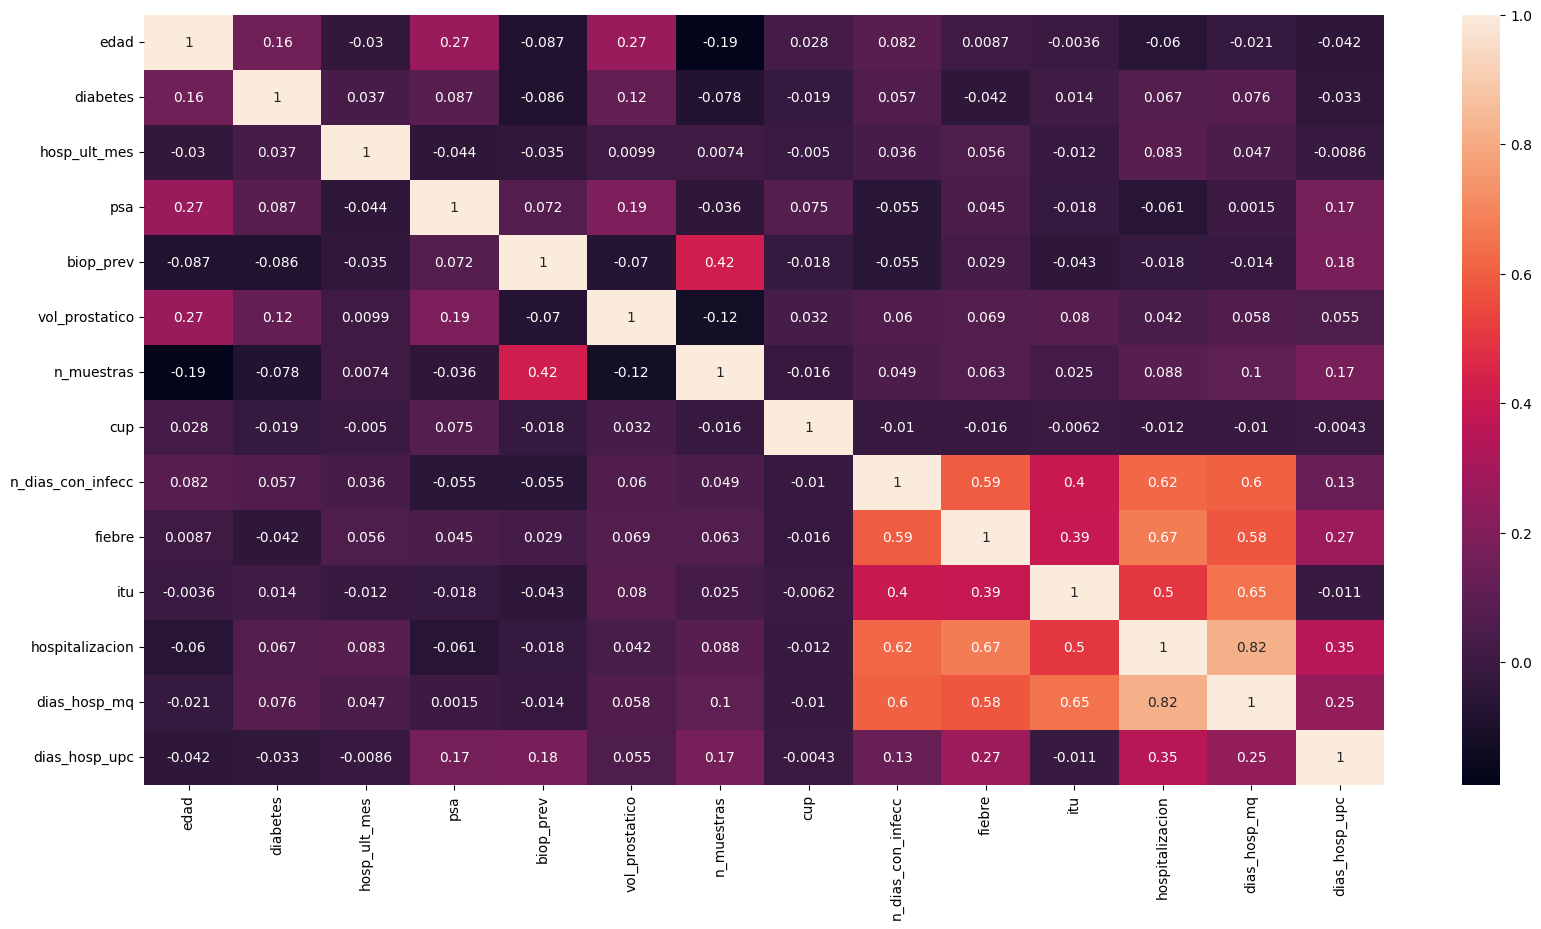

In [62]:
#grafico de las correlaciones
plt.figure(figsize=(20,10))
sns.heatmap(corr,annot=True)

In [63]:
df_main = dummies('tipo_cultivo') #cambiar NO - NO_tipo_cultivo
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,agente_aislado,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS,HEMOCULTIVO,HEMOCULTIVO Y UROCULTIVO,NO,UROCULTIVO
0,53,0,0,4.0,0,1,12,0,0,1,1,0,NO,NO,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
2,57,0,0,29.0,1,1,24,0,0,1,1,0,E.COLI,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
3,56,0,0,7.0,0,1,12,0,0,1,1,0,NO,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
4,55,0,0,29.0,1,1,24,0,0,1,1,0,E.COLI,NO,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,12,0,0,0,0,0,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
452,55,0,0,5.0,0,0,12,0,0,0,0,0,NO,NO,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,NO,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,NO,NO,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0


In [64]:
df_main = dummies('agente_aislado') # NO - NO_agente_aislado
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,patron_resistencia,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS,HEMOCULTIVO,HEMOCULTIVO Y UROCULTIVO,NO,UROCULTIVO,E.COLI,NO,PSEUDOMONAS AERUGINOSA
0,53,0,0,4.0,0,1,12,0,0,1,1,0,NO,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,57,0,0,29.0,1,1,24,0,0,1,1,0,"AMPI R, CIPRO R, GENTA R, SULFA M R",1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
3,56,0,0,7.0,0,1,12,0,0,1,1,0,NO,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
4,55,0,0,29.0,1,1,24,0,0,1,1,0,NO,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,12,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
452,55,0,0,5.0,0,0,12,0,0,0,0,0,NO,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,NO,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,NO,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0


In [65]:
df_main = dummies('patron_resistencia') # NO - NO_patron_resistencia
df_main

,edad,diabetes,hosp_ult_mes,psa,biop_prev,vol_prostatico,n_muestras,cup,e_cpo,n_dias_con_infecc,fiebre,itu,hospitalizacion,dias_hosp_mq,dias_hosp_upc,ADENOCARCINOMA GLEASON 6,ADENOCARCINOMA GLEASON 7,ADENOCARCINOMA GLEASON 8,ADENOCARCINOMA GLEASON 9,CARCINOMA INDIFERENCIADO DE CELULAS CLARAS,HIPERPLASIA PROSTATICA,NEG,PROSTATITIS,CEFALOSPORINA_AMINOGLUCOCIDO,FLUOROQUINOLONA_AMINOGLICOSIDO,OROQUINOLONAS,OTROS,HEMOCULTIVO,HEMOCULTIVO Y UROCULTIVO,NO,UROCULTIVO,E.COLI,NO,PSEUDOMONAS AERUGINOSA,"AMPI R, CIPRO R, GENTA R, SULFA M R",MULTI SENSIBLE,NO,"RESISTENTE A AMPI, CIPRO Y GENTA","RESISTENTE A AMPI, SULFA, CEFADROXILO, CEFUROXIMO, CIPRO Y CEFEPIME, CEFOTAXIMA"
0,53,0,0,4.0,0,1,12,0,0,1,1,0,1,2,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
1,56,0,0,7.7,0,1,12,0,0,1,1,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
2,57,0,0,29.0,1,1,24,0,0,1,1,0,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0
3,56,0,0,7.0,0,1,12,0,0,1,1,0,1,5,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
4,55,0,0,29.0,1,1,24,0,0,1,1,0,1,4,3,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451,69,1,0,10.6,1,1,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
452,55,0,0,5.0,0,0,12,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
453,70,1,0,18.0,0,1,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0
455,67,0,0,6.0,0,1,12,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0


Para el caso de las variables numéricas, ¿Es necesario normalizar?

Realice las transformaciones que considere pertinentes con el fin de preparar los datos para un modelo de clasificación de un paciente con desenlace en Hospitalización. 

Realice una matriz de correlación con el fin de determinar si hay variables redundantes. En caso de encontrar altas correlaciones, ¿Tomará alguna acción?

Exporte la base de datos preparada en un archivo .csv para el modelamiento. 